# 第九章之Matplotlib基础教程
___

## 学习目标
1. 掌握Matplotlib的基本绘图知识

2. 对Matplotlib三维绘图的基本能力

3. 能对图形进行美化，输出

## 1. 背景介绍

Matplotlib是出色的2D和3D科研绘图工具。Matplotlib具有极大优点：
- 容易上手和掌握
- 支持$\LaTeX$格式的标签和文本显示
- 对图形元素的控制较好，如图片大小和DPI
- 可以输出多种高性能的图片格式，如PNG, PDF, SVG, EPS和PGF
- 可以用图形用户界面输出多张图片并进行批量的调试

## 2. 简单绘图

首先，我们要设置在Jupyter Notebook中在线显示图片：

In [51]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.display import HTML
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

然后导入必要的模块。这有两种方式，一种是导入`pylab`模块，这种方法更加方便一些：

In [52]:
import pylab

也可以用另一种方式：

In [53]:
import matplotlib
import matplotlib.pyplot as plt

In [54]:
import numpy as np

### 用类似Matlab的语法生成图片

In [55]:
from pylab import *

In [56]:
x = np.linspace(0, 5, 10)
y = x ** 2

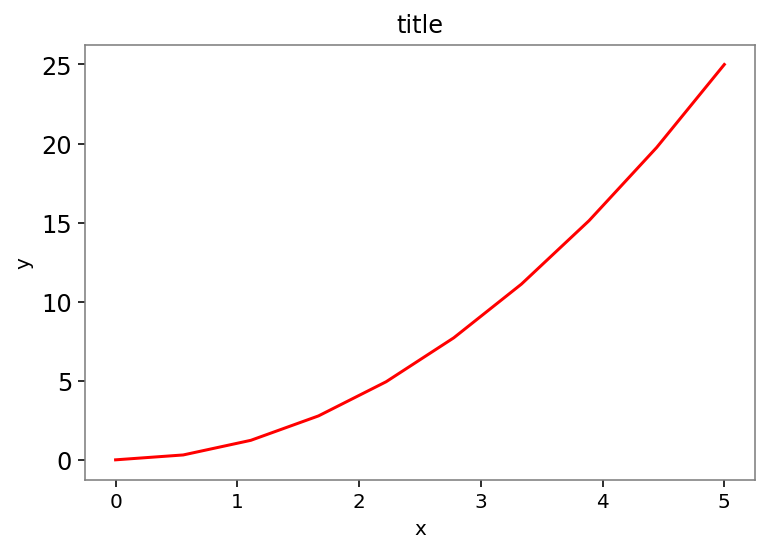

In [57]:
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

还可以绘制多张图片，并设置颜色和线型：

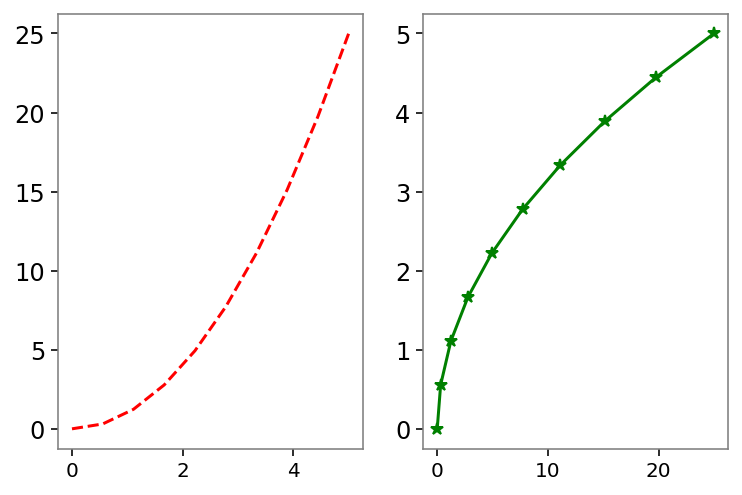

In [58]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

前面这种方式封装了来自Matlab相似的语法，对于熟悉Matlab的开发者来说比较容易上手。

### Matplotlib-API的绘图方式

这是一种面向对象的API。
- 首先创建一个Figure对象fig
- 用`add_axes()`方法在其中添加坐标系
- 在坐标系中绘图

Text(0.5, 1.0, 'title')

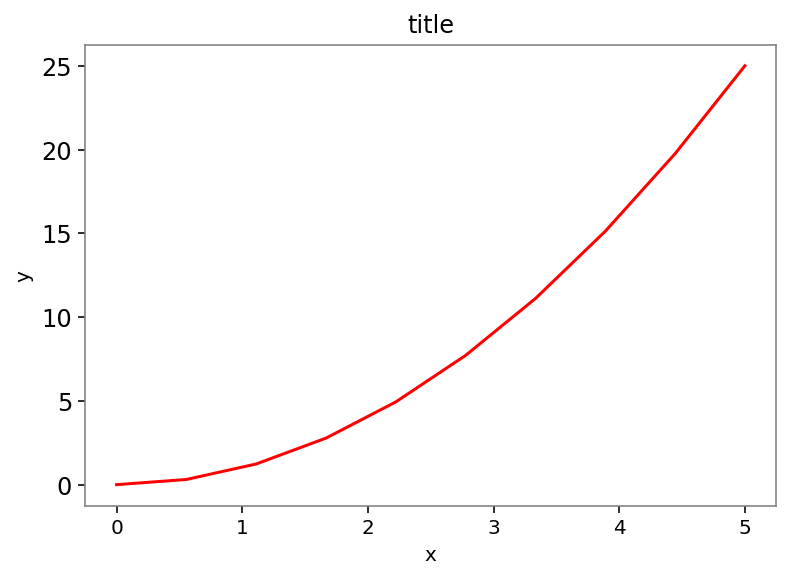

In [59]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height, 0-1 percentage
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

代码比刚才多了一些，优点是我们对这个体系有更好的控制：

Text(0.5, 1.0, 'sub-title')

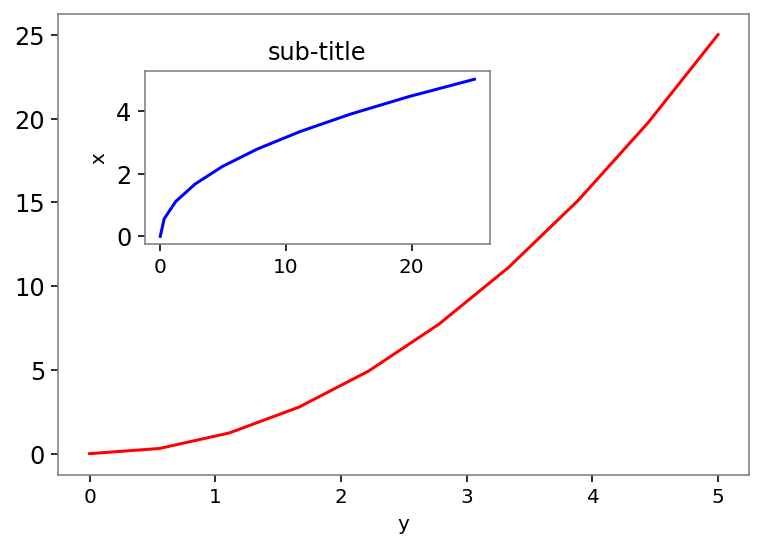

In [60]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('title')

axes2.plot(y, x, 'b')
axes1.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('sub-title')

如果我们不想人工去设置画布上图片的放置位置，我们可以让系统自动去布局，比如我们可以用subplots：

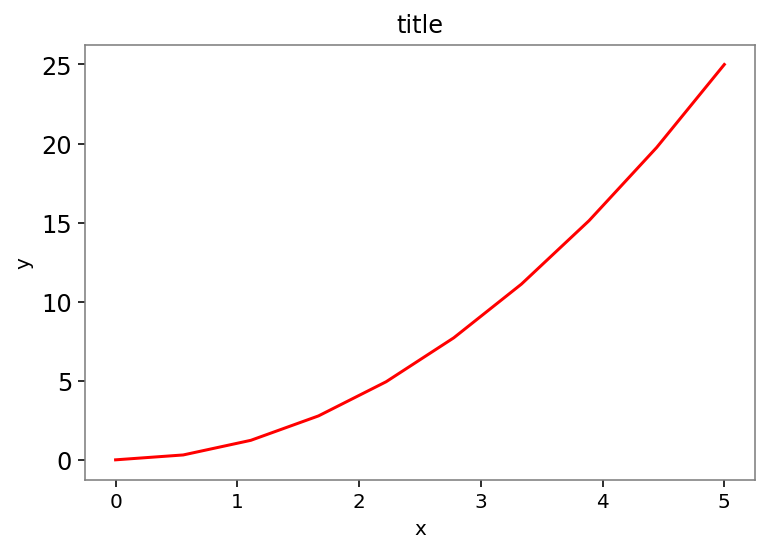

In [61]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

甚至通过设置subplots的grid模式实现多张图并排：

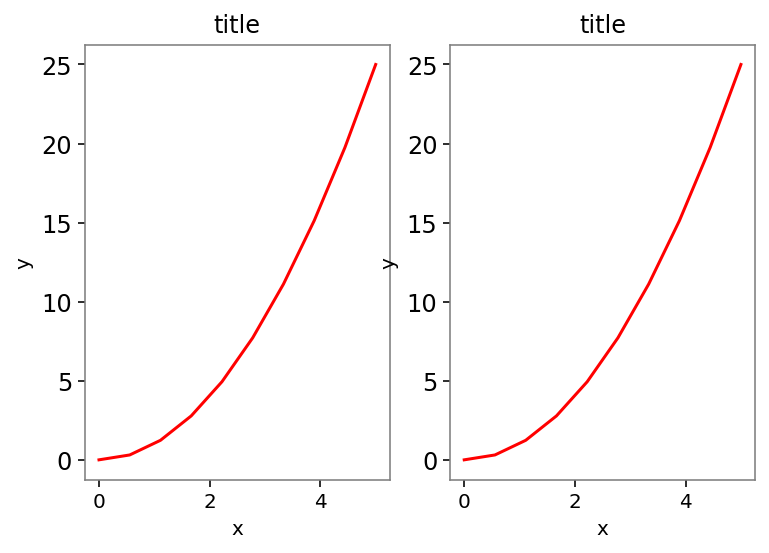

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

有点太挤了，是不是？我们可以调用`fig.tight_layout()`方法重排一下：

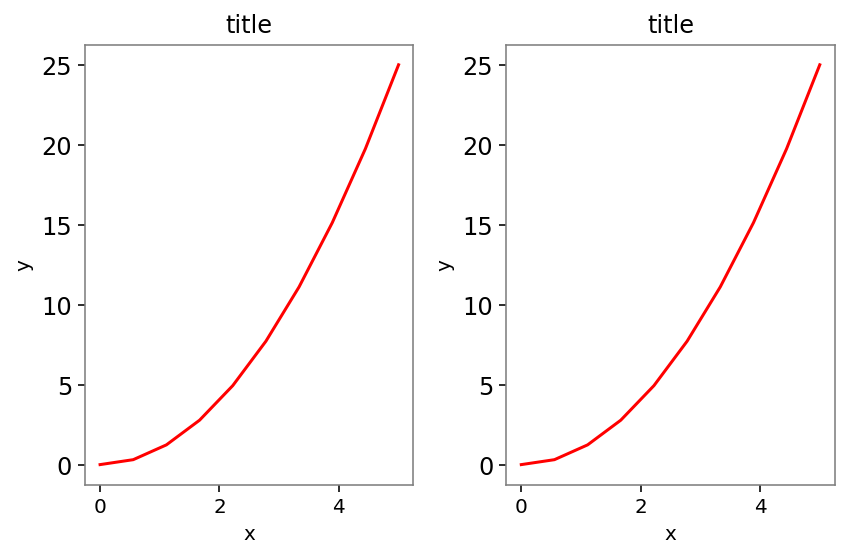

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### 设置图片大小、长宽比和DPI

在创建Figure对象的时候，我们可以输入关键词参数`figsize`和`dpi`设置图片的大小和DPI：
- `figsize`是一个tuple，分别对应长和宽，默认单位为英寸（inches）
- `dpi`是`dots-per-inches`的缩写

<Figure size 800x400 with 0 Axes>

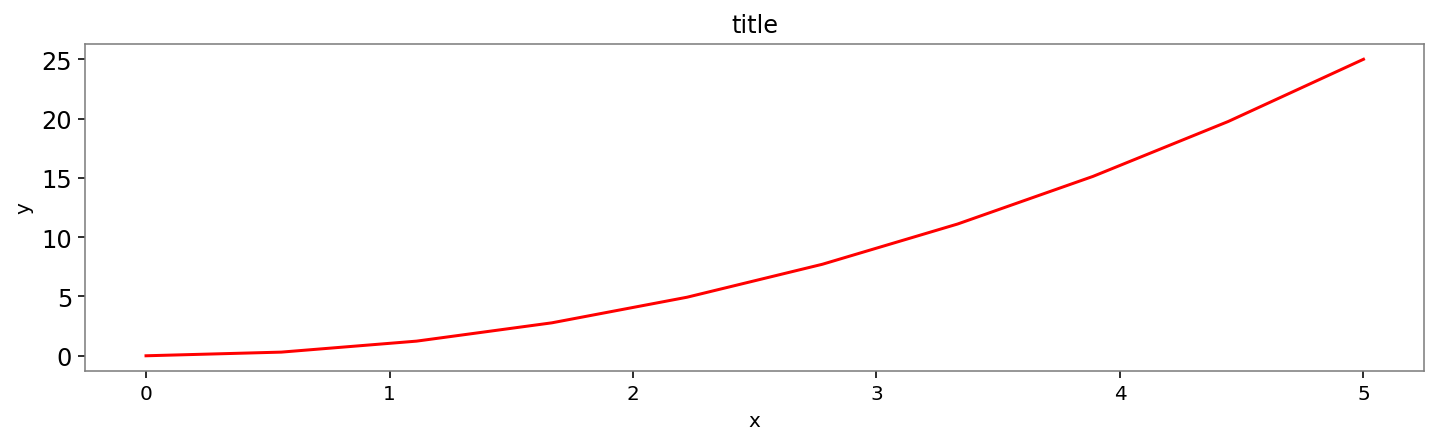

In [64]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### 保存图片

调用`Figure`类的`savefig()`方法保存图片：

In [65]:
import os

In [66]:
os.mkdir("./fig")

FileExistsError: [Errno 17] File exists: './fig'

In [67]:
fig.savefig('fig/filename.png')

如果需要生成高质量的图片，推荐用PDF格式，这样在$\LaTeX$中可以通过`\includegraphics{}`的方式插入pdf图片，可以获得高质量的文章。

In [68]:
fig.savefig('fig/filename.pdf', dpi=120)

### 设置图标、标签和图片标题

#### 设置标题

设置标题可用坐标系实例的`set_title()`方法设置图片的标题：

In [69]:
ax.set_title("title")

Text(0.5, 1, 'title')

#### 设置标签

同样，用坐标系实例的`set_xlabel()`和`set_ylabel()`方法分别设置横坐标和纵坐标的标签：

In [70]:
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(454.5999999999999, 0.5, 'y')

#### 设置图示

添加曲线的图示有两种方法：
- 通过`ax.legend(["curve 1", "curve 2", "curve 3"])`用列表设置多个图示
- 在绘图`plot(..., label="curve 1")`的方式为每个曲线设置标签，然后再运行`ax.legend()`就可以了

<Figure size 800x400 with 0 Axes>

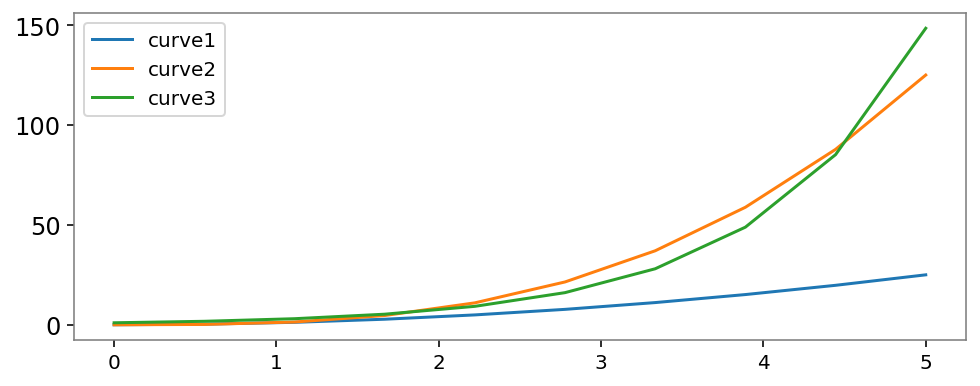

In [71]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.plot(x, np.exp(x), label="curve3")
ax.legend()

上面`legend()`方法可以使用一个参数`loc`设置图示在图中的位置：

In [ ]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

将上面的内容汇总在一起，可以生成新的图形：

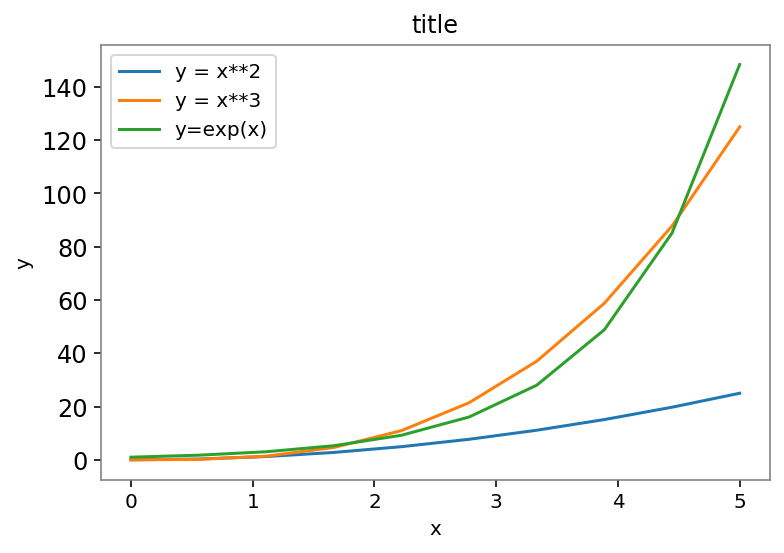

In [72]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.plot(x, np.exp(x), label="y=exp(x)")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

这种图示的显示还是不够完善，能否显示特别的公式呢？答案显然是肯定的：

### 设置图形文字的显示

#### $\LaTeX$格式文字的设置

- 我们可以在`legend`、`xlabel`、`ylabel`和`title`中显示用$\LaTeX$写就的数学公式

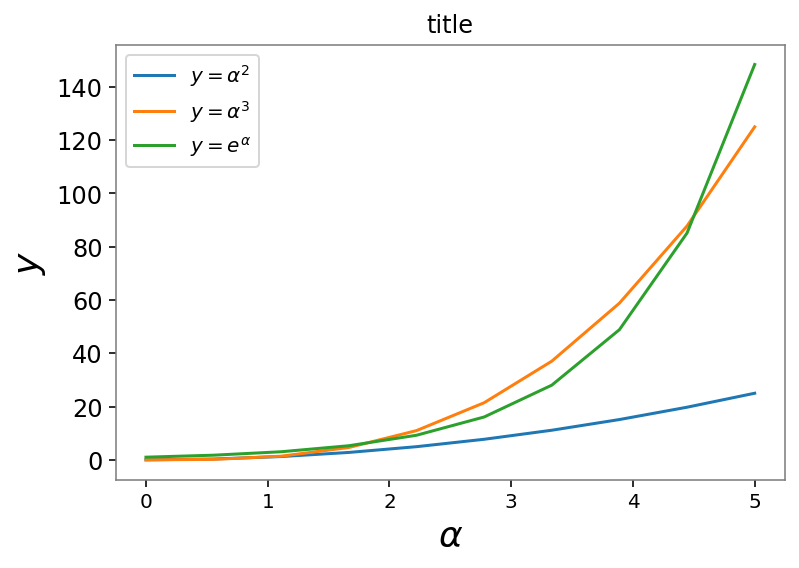

In [73]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.plot(x, np.exp(x), label=r"$y = e^{\alpha}$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

我们还可以修改全局的文字大小和字体：

In [74]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

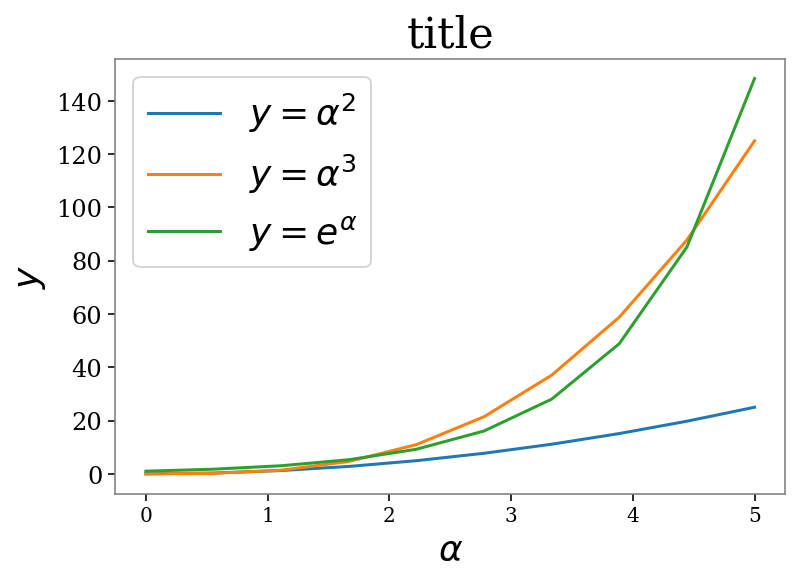

In [75]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.plot(x, np.exp(x), label=r"$y = e^{\alpha}$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

我们还可以选择更好的字体：

In [76]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

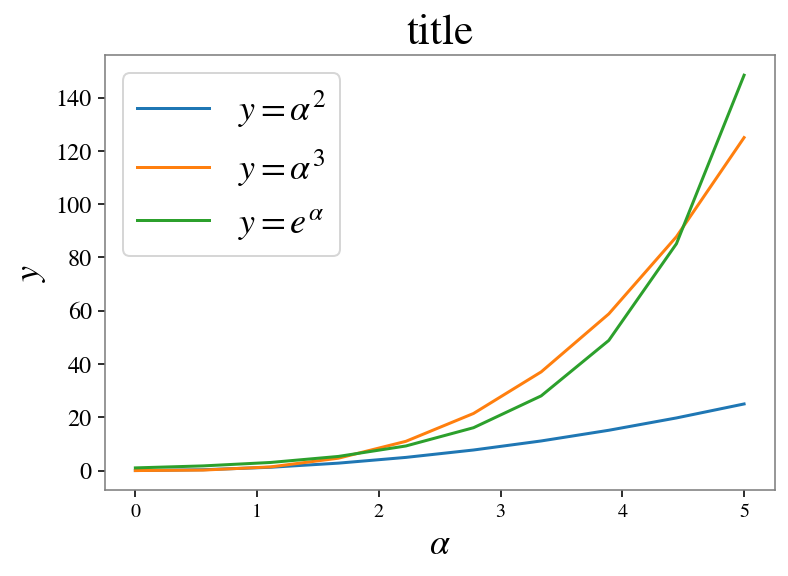

In [77]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.plot(x, np.exp(x), label=r"$y = e^{\alpha}$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

我们还可以设置以$\LaTeX$格式显示图形中的文字：

In [78]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

In [79]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

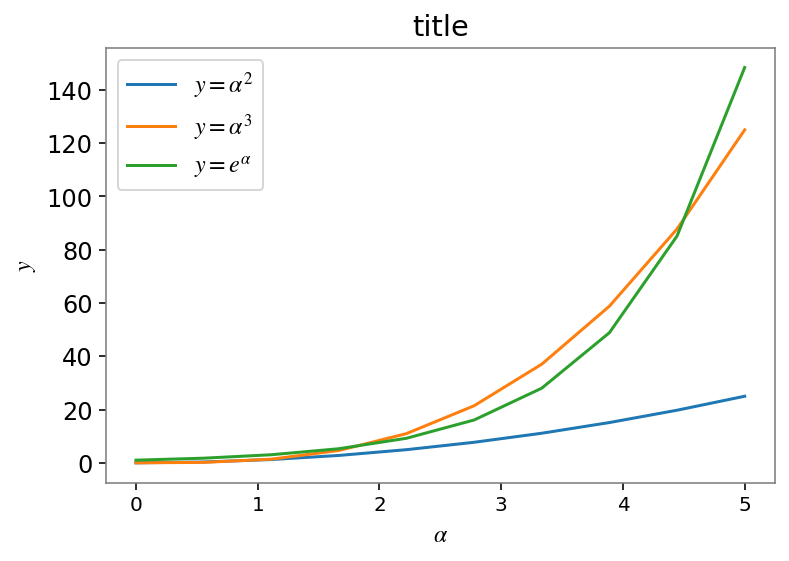

In [80]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.plot(x, np.exp(x), label=r"$y = e^{\alpha}$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### 设置颜色、线宽、线型等

可以采用类似Matlab的风格：

In [81]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

也可以显式设置曲线的颜色，可以用颜色的名称，也可以用RGB三原色的十六进制方式设置：

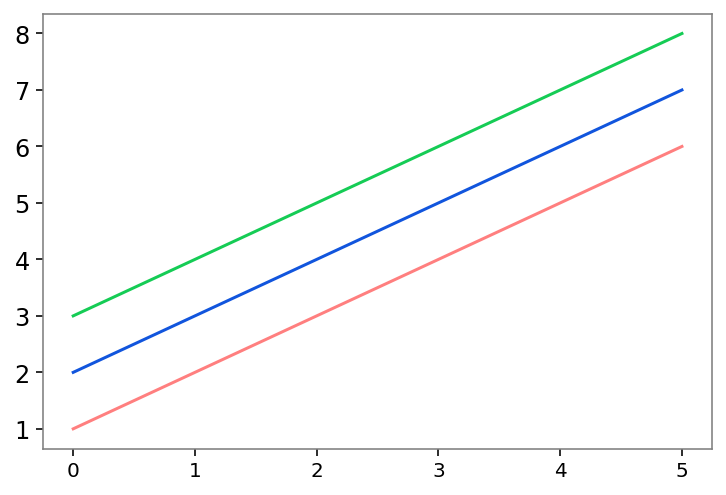

In [82]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparent red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### 曲线线宽和线型的设置
- 线宽采用`linewidth`或者`lw`关键词参数设置
- 线型采用`linestyle`或`ls`进行设置
- 点型可用`marker`参数设置

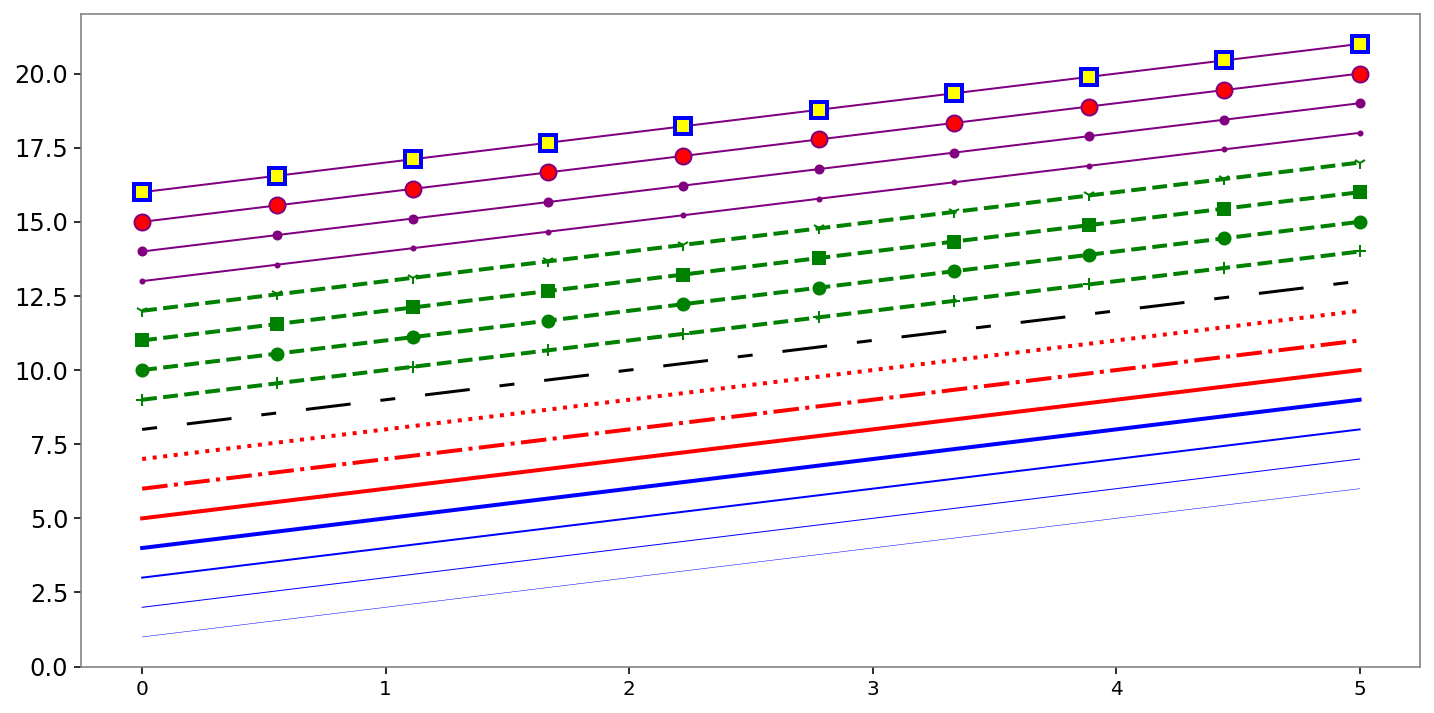

In [83]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### 坐标轴的外观设置

对于要发表的图片来说，坐标轴的外观是一个重要的因素，比如刻度和坐标标签的位置，字体大小等。

#### 设置坐标范围

设置横坐标和纵坐标的范围可以简单的通过`ax.set_xlim()`和`ax.set_ylim()`实现，也可以用`ax.axis("tight")`让系统自动设置。

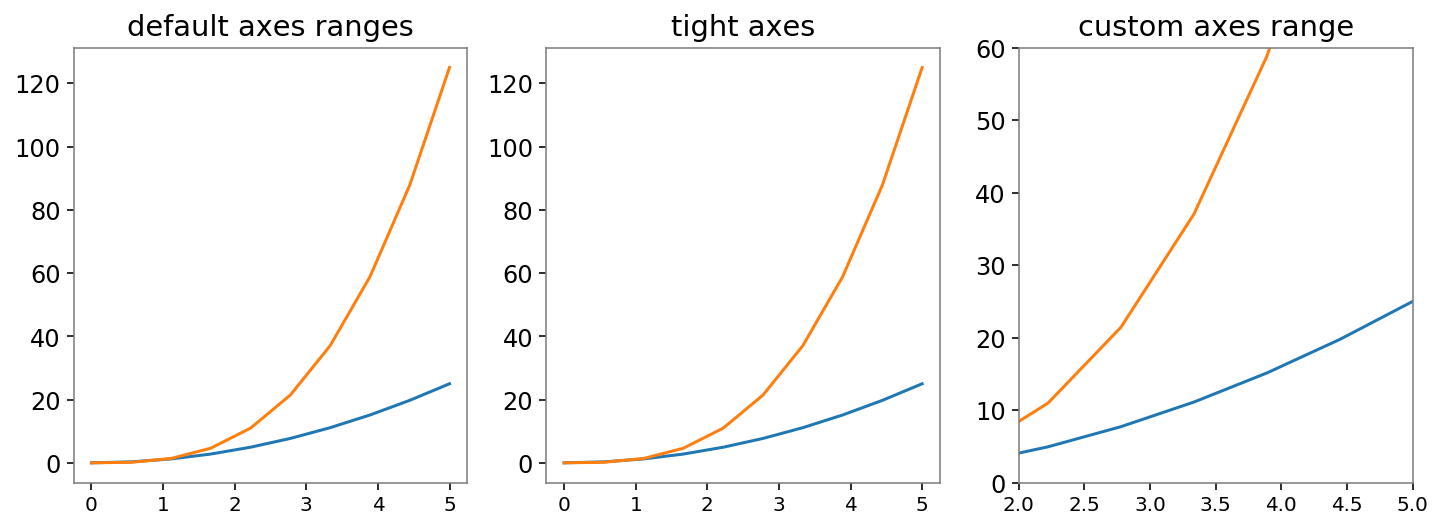

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### 为坐标设置对数标度

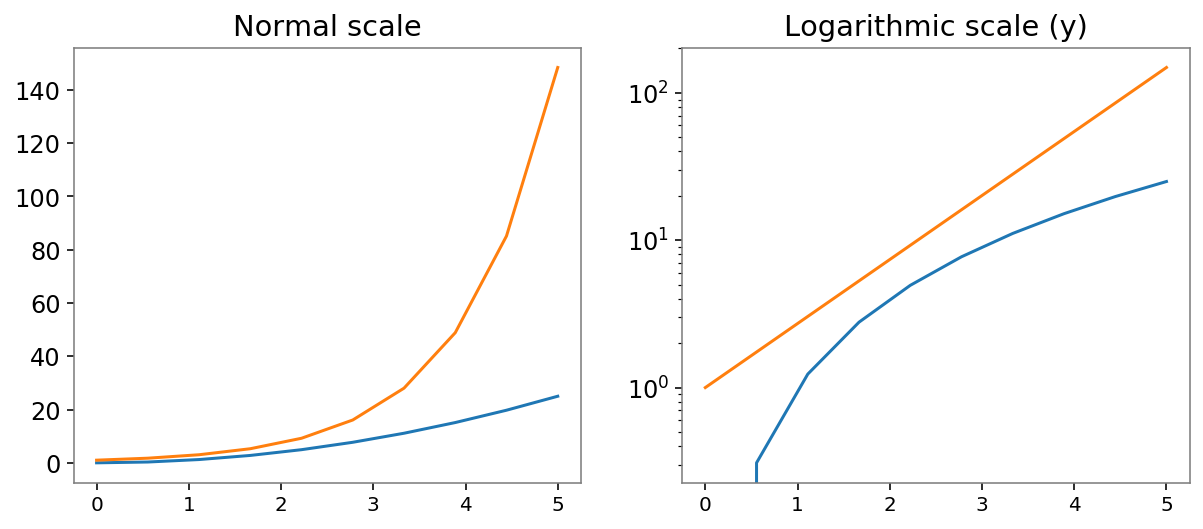

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

#### 刻度和刻度标签的设置

- 刻度可用`ax.set_xticks()`和`ax.set_yticks()`进行设置
- 刻度标签则用`ax.set_xticklabels()`和`ax.set_yticklabels()`方法进行设置。

In [87]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

#### 科学计数法的使用

如果坐标值非常大，可以考虑用科学计数法表示：

Text(0, 0.5, 'y')

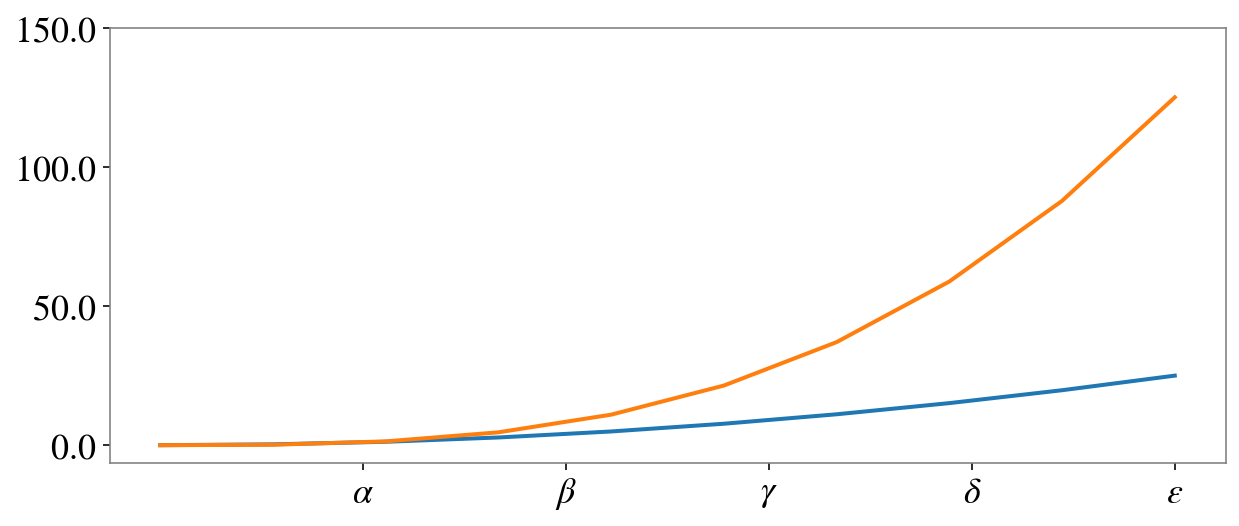

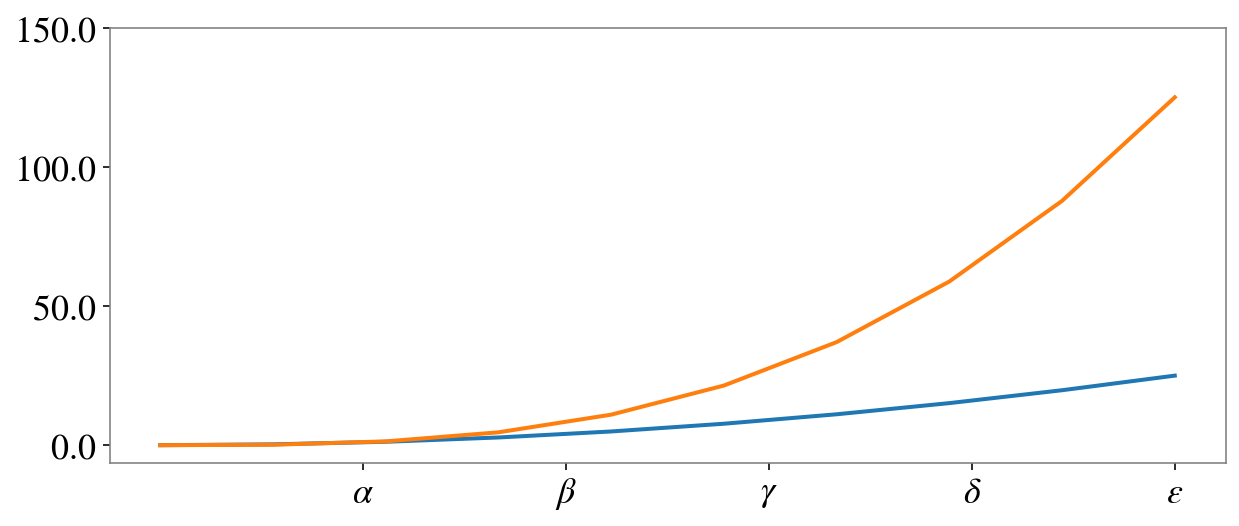

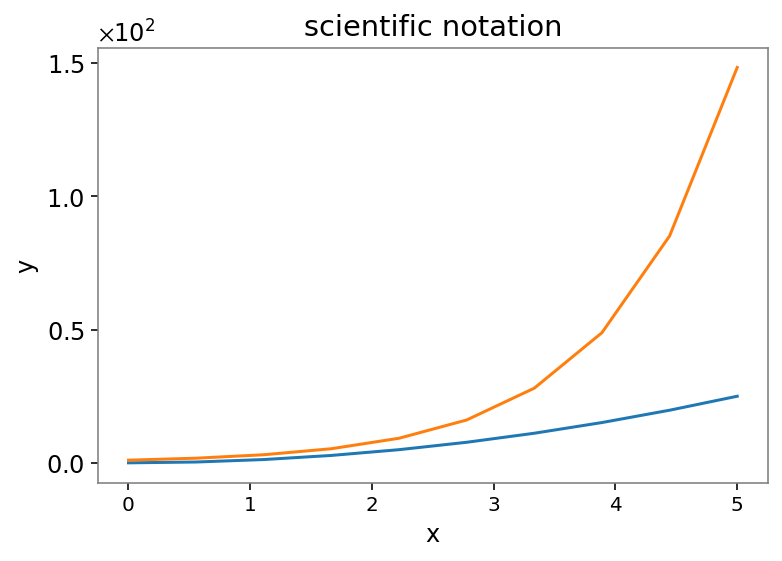

In [88]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel("x")
ax.set_ylabel("y")

### 调整坐标与坐标轴标注之间的距离
我们可能会觉得坐标与标注之间的举例太近了，可以调整参数：

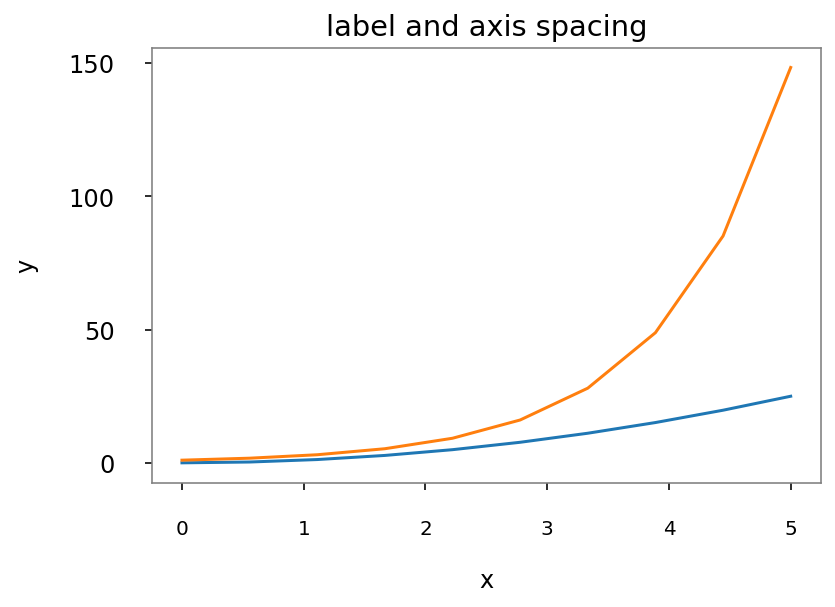

In [89]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 15
matplotlib.rcParams['ytick.major.pad'] = 15

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15

ax.set_xlabel("x")
ax.set_ylabel("y");

In [90]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

### 对坐标进行调整

当我们在保存图片的时候，往往坐标轴的标注会被修剪掉，这时候我们需要用`subplots_adjust`对坐标轴进行调整:

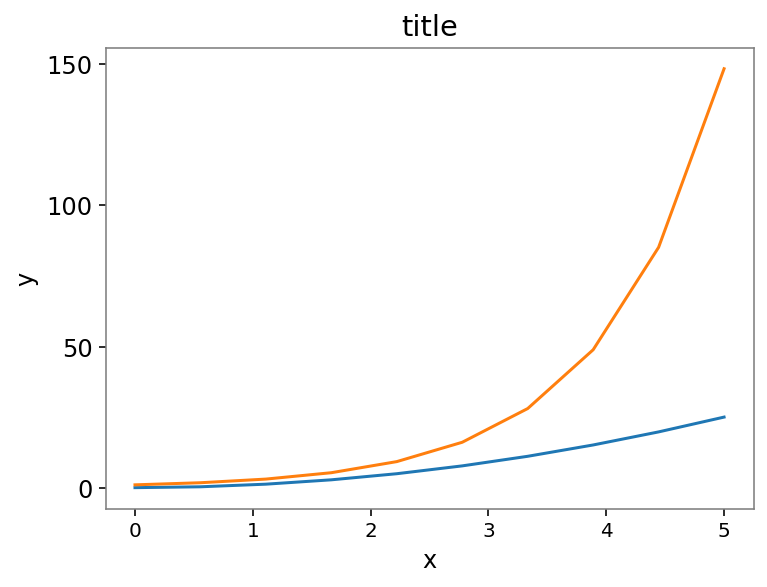

In [91]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### 改变坐标网格的形式

用`grid`可以开关网格的显示，但我们还可以进一步调整网格的显示，如线型

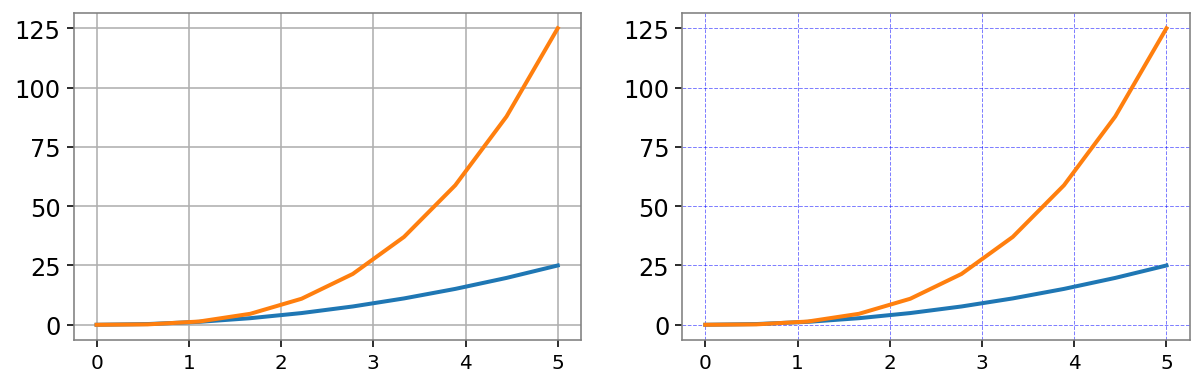

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### 更改坐标轴的显示格式

我们可以设置坐标轴的颜色、线宽等等：

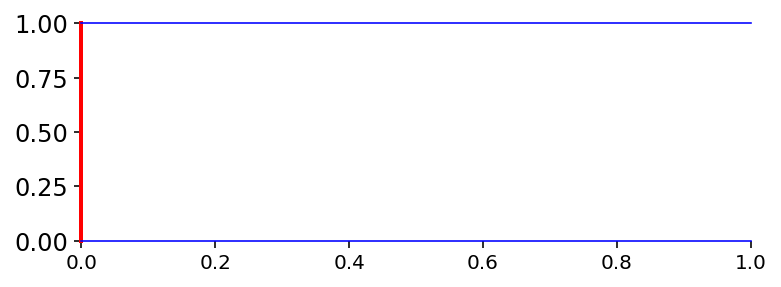

In [93]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### 双坐标轴显示

当在同一坐标中绘制多个图，因为两个指标具有不同的单位和分布，需要用到双坐标轴（同一个X轴，不同的Y轴）：

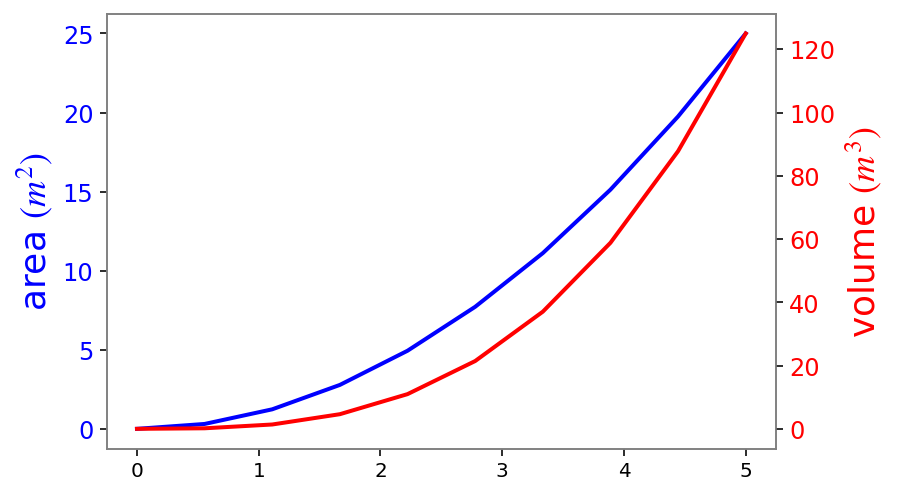

In [94]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### 令X轴和Y轴相交于原点

我们可以看到，前面的图中，坐标轴都不是相交于原点的，我们可以修改：

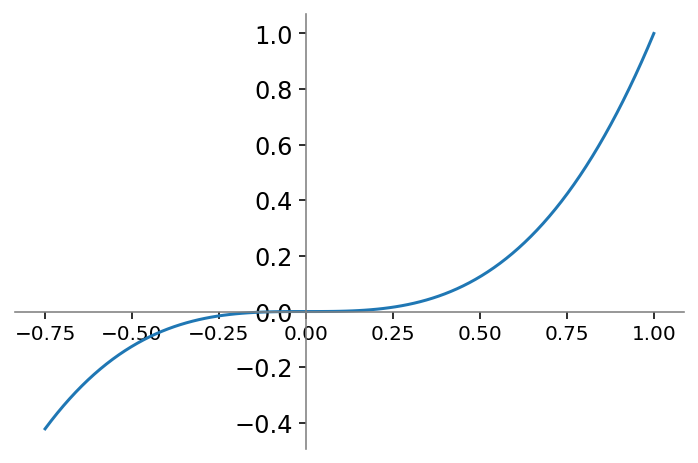

In [96]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## 其他类型的2D图形

想要看更多的2D图形怎么绘制，可以参考http://matplotlib.org/gallery.html 。

In [97]:
n = np.array([0,1,2,3,4,5])

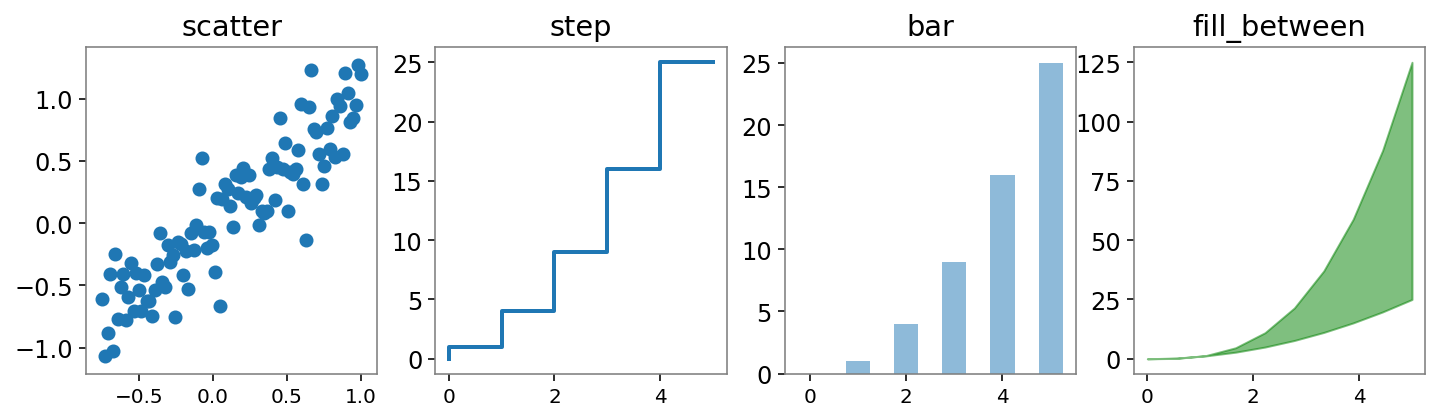

In [98]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

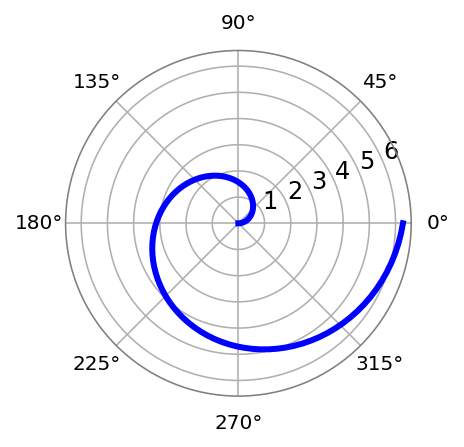

In [99]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

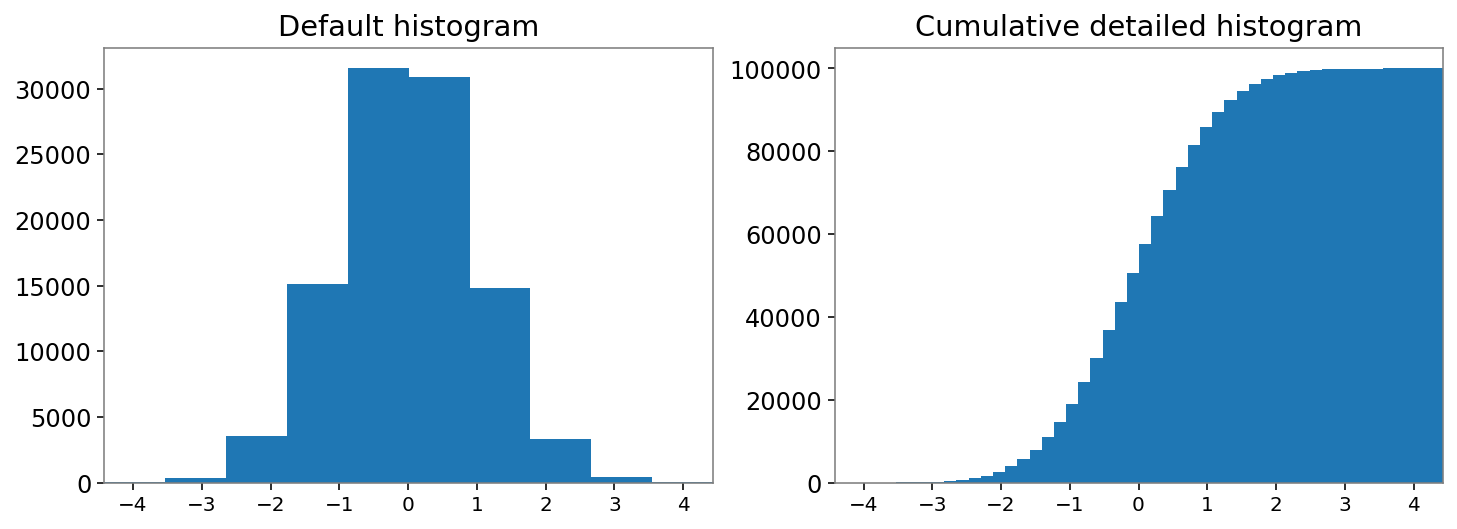

In [100]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

## 文字标注

我们还可以用`text()`在图中加入文字标注，可以支持$\LaTeX$风格的标注：

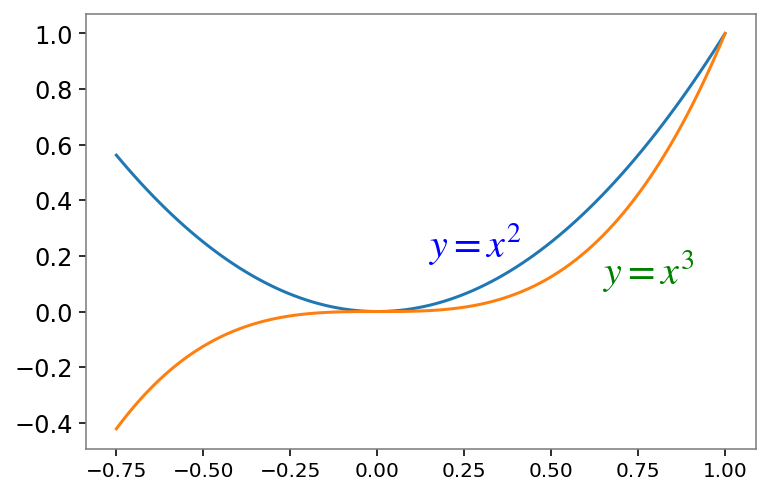

In [101]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## 包含多个子图和图中插图的做法

我们可以通过`fig.add_axes()`手动添加坐标，或者通过各种子图布局管理器`subplots()`，`subplot2grid()`以及`gridspec()`进行子图布局设置：

### `subplots`

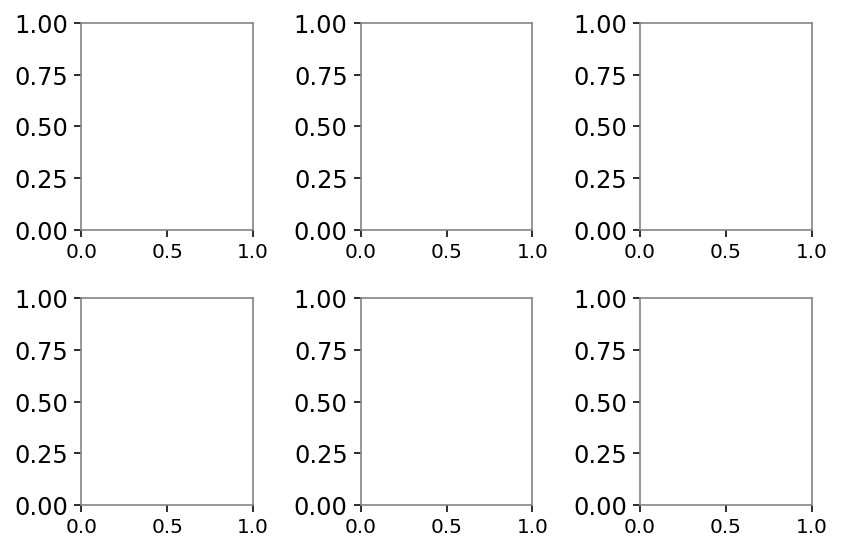

In [102]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

### `subplot2grid`

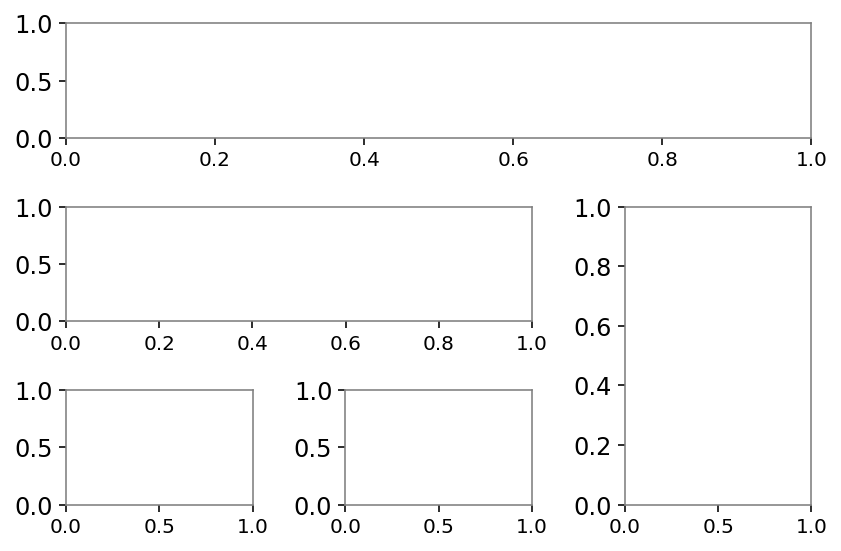

In [103]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

### `gridspec`

In [ ]:
import matplotlib.gridspec as gridspec

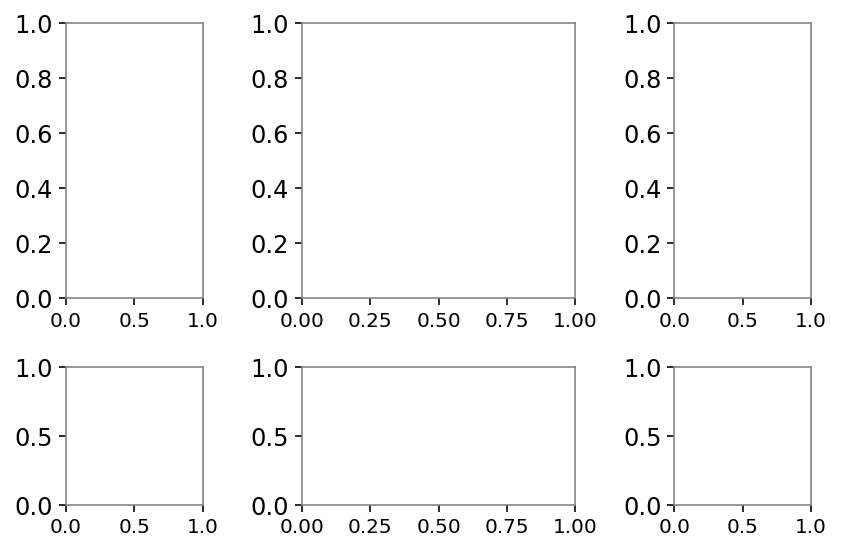

In [104]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### `add_axes`

`add_axes()`可以实现手动添加坐标轴，尤其是添加图中图：

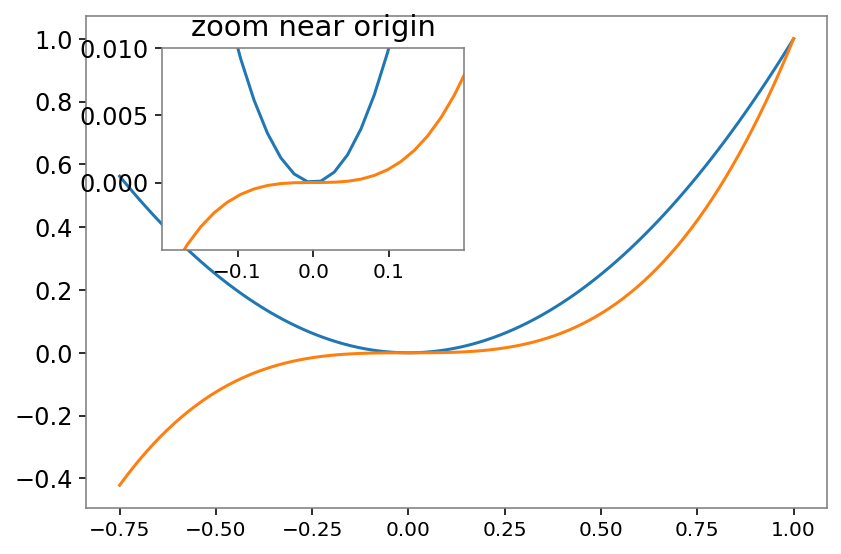

In [105]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### 其他2D图：色图与等高线图

In [106]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [107]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### `pcolor`

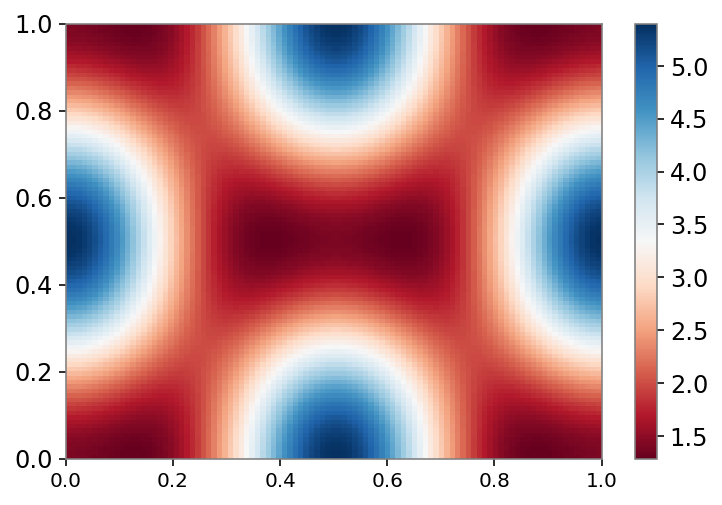

In [108]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### `imshow`

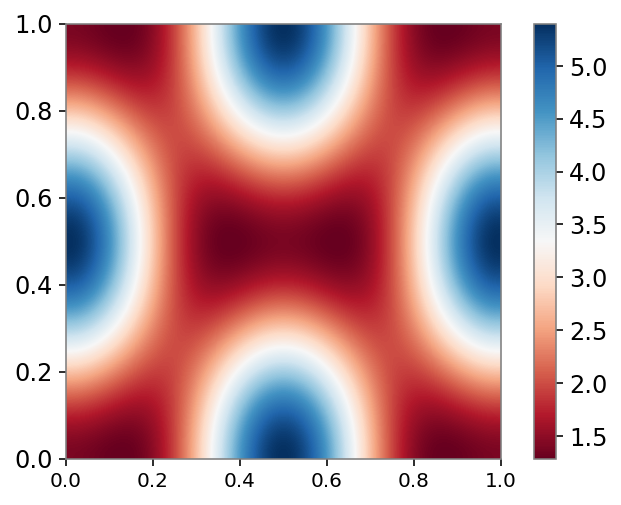

In [109]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### `contour`

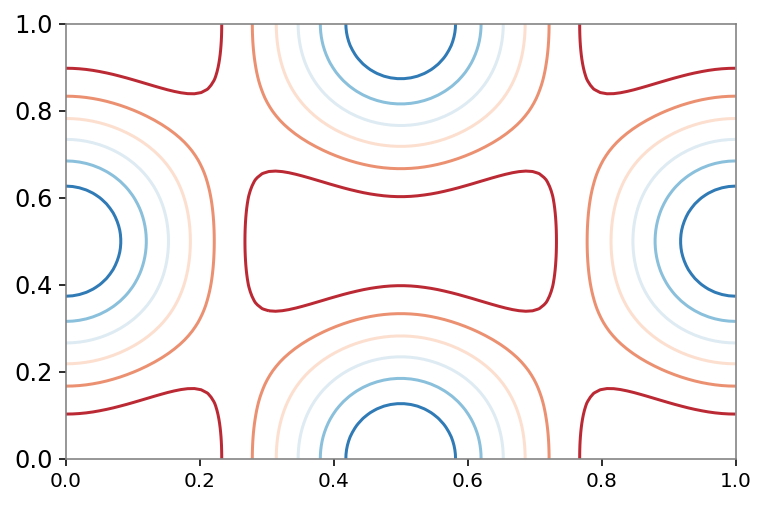

In [110]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D图形

绘制三维图有两种方式：
1. 创建`Axes3D`类的实例，然后三维坐标可以像2D坐标一样添加到画布中。
2. 一种更方便的方式是将`projection='3d'`传递给`add_axes()`或者`add_subplot()`方法。

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### 表面图（Surface Plot）

In [ ]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, 
                    linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

### 线框图（wire-frame plot)

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

### 有投影的等高线图（contour plot with projection）

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

### 修改三维图的视角

可通过`view_init()`方法修改三维图的视角，该方法具有两个参数（都是角度）：
- `elevation`：提升视角
- `azimuth`：方位视角

In [ ]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

## 动画（animation）

Matplotlib包含一个简单的动画模块`animation`中的`FuncAnimation()`函数生成一系列由多个图片组成的动画。这个函数主要包含几个参数：
- `fig`：画布
- `func`：更新图形的函数
- `func_init`：图形初始化函数
- `frame`：产生帧的数量
- `blit`：True/False, 是否只更新改变的部分，实现动画的平滑过渡

In [ ]:
def init():
    # setup figure

def update(frame_counter):
    # update figure for new frame

anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

anim.save('animation.mp4', fps=30) # fps = frames per second

下面用一个实例说明用法：

In [ ]:
from matplotlib import animation

In [ ]:
# solve the ode problem of the double compound pendulum again

from scipy.integrate import odeint
from numpy import cos, sin

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

产生一个钟摆动画：

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

# def init():
#     pendulum1.set_data([], [])
#     pendulum2.set_data([], [])

pendulum1.set_data([], [])
pendulum2.set_data([], [])

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])
    return pendulum1, pendulum2

anim = animation.FuncAnimation(fig, update, frames=len(t), blit=True)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders
#anim.save('data/animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
#anim.save('data/animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
anim.save('data/animation.mp4', writer=writer)
#anim.save('data/animation.mp4', fps=20, writer="avconv", codec="libx264")

#plt.close(fig)
HTML(anim.to_html5_video())

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.edgecolor'] = 'gray'


axalpha = 0.05
figcolor = 'white'
dpi = 80
fig = plt.figure(figsize=(6, 1.1), dpi=dpi)
fig.patch.set_edgecolor(figcolor)
fig.patch.set_facecolor(figcolor)


def add_math_background():
    ax = fig.add_axes([0., 0., 1., 1.])

    text = []
    text.append(
        (r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
         r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2}"
         r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 "
         r"\left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - "
         r"\alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} "
         r"}{U^{0\beta}_{\rho_1 \sigma_2}}\right]$", (0.7, 0.2), 20))
    text.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} "
                 r"= -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$",
                 (0.35, 0.9), 20))
    text.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$",
                 (0.15, 0.3), 25))
    text.append((r"$F_G = G\frac{m_1m_2}{r^2}$",
                 (0.85, 0.7), 30))
    for eq, (x, y), size in text:
        ax.text(x, y, eq, ha='center', va='center', color="#11557c",
                alpha=0.25, transform=ax.transAxes, fontsize=size)
    ax.set_axis_off()
    return ax


def add_matplotlib_text(ax):
    ax.text(0.95, 0.5, 'matplotlib', color='#11557c', fontsize=65,
            ha='right', va='center', alpha=1.0, transform=ax.transAxes)


def add_polar_bar():
    ax = fig.add_axes([0.025, 0.075, 0.2, 0.85], projection='polar')

    ax.patch.set_alpha(axalpha)
    ax.set_axisbelow(True)
    N = 7
    arc = 2. * np.pi
    theta = np.arange(0.0, arc, arc/N)
    radii = 10 * np.array([0.2, 0.6, 0.8, 0.7, 0.4, 0.5, 0.8])
    width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    for r, bar in zip(radii, bars):
        bar.set_facecolor(cm.jet(r/10.))
        bar.set_alpha(0.6)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(False)

    for line in ax.get_ygridlines() + ax.get_xgridlines():
        line.set_lw(0.8)
        line.set_alpha(0.9)
        line.set_ls('-')
        line.set_color('0.5')

    ax.set_yticks(np.arange(1, 9, 2))
    ax.set_rmax(9)
    
main_axes = add_math_background()
add_polar_bar()
add_matplotlib_text(main_axes)
plt.show()